In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import chi2, chi2_contingency
import scipy.stats as stats
import warnings

In [ ]:
warnings.filterwarnings("ignore")

#Step 1

The following dataset contains various features like:
1. age => numerical
2. work class => categorical
3. fnlwgt => numerical
4. education => categorical
5. education-num => numerical
6. marital-status => categorical
7. occupation => categorical
8. relationship => categorical
9. race => categorical
10. sex => categorical
11. capital-gain => numerical
12. capital-loss => numerical
13. hours-per-week => numerical
14. native-country => categorical
15. income => categorical

#Step 2

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/adult (1).csv")

In [ ]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
numerical_columns = list(dataset.describe().columns)

In [ ]:
numerical_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [ ]:
categorical_columns = [x for x in dataset.columns if x not in numerical_columns]

In [ ]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

#Step 3

##Numerical

###PDF

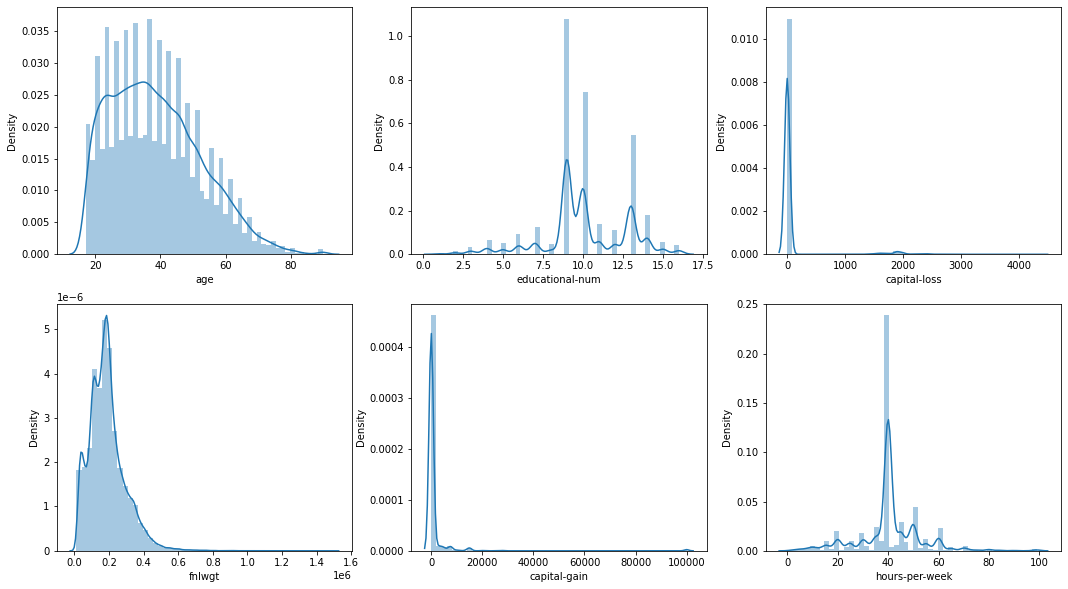

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
for i in range(len(numerical_columns)):
  k = i % 2
  t = i // 2
  sns.distplot(dataset.loc[:, numerical_columns[i]], kde=True, ax = ax[k, t])
plt.show()

Observations :
1. age : Appears to be a positively skewed distribution with a long tail on right as compared to left of right to csv only containing adults i.e from age 18 and above. 
2. education-num : Plot consists of various peaks and one middle peak with highes density around 8.
3. capital-loss : It appears to be a pareto distribution due to the fact of a long tail and starting with an intercept. Also 0, 25, 50 and 75 percentile all are 0.
4. capital-gain : It appears to be a pareto distribution due to the fact of a long tail and starting with an intercept. Also 0, 25, 50 and 75 percentile all are 0.
5. fnlwgt : The plot first increases with some small dips in between but after reacher maximum peak around 0.2 it gradually descreases.
6. hours-per-week : The plot increases and then decreases with some dips and between in between also know as local minima and local maxima respectively.

###Box Plots

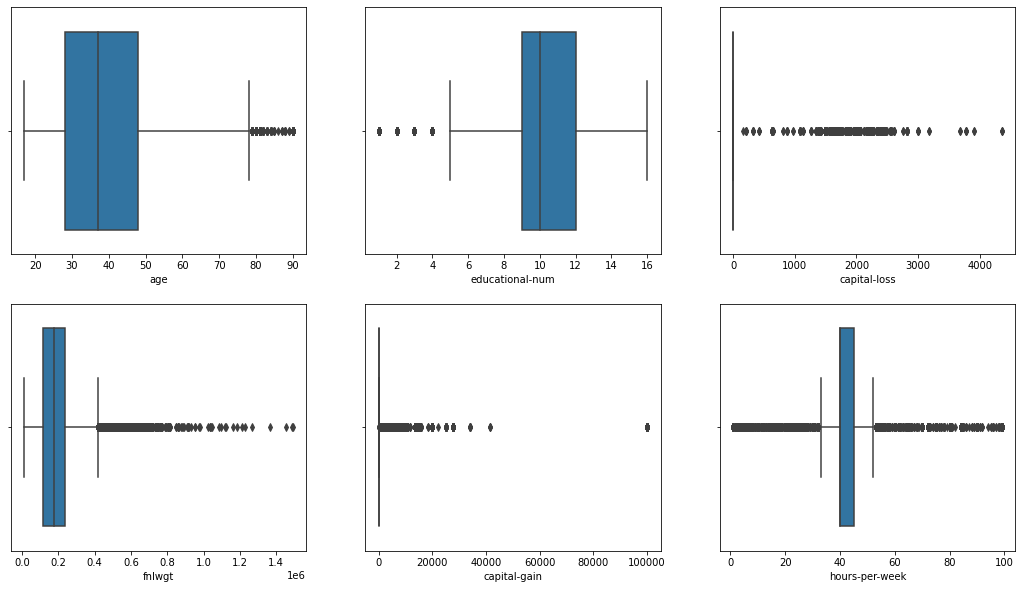

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
for i in range(len(numerical_columns)):
  k = i % 2
  t = i // 2
  sns.boxplot(dataset.loc[:, numerical_columns[i]], ax = ax[k, t])
plt.show()

Observations:

1. age : Consists of various outliners after age 79 due to the fact that retirement age is usually 60-65 in most countries and individual become old in order to work properly and hence are considered as outliners due to less density.
2. educational-num : Some outliners present before minimum iqr.
3. capital-loss : Most points after 0 are considered as outliners due to the fact that 0, 25, 50 and 75 pecentile values are 0 itself.
4. capital-gain : Most points after 0 are considered as outliners due to the fact that 0, 25, 50 and 75 percentile values are 0 itself.
5. fnlwgt : No outliners before minimum iqr, many after maximum iqr i.e 0.4.
6. hours-per-week : Lot of outliners with 50th and 25th percentile as 40 hours per week.

###Histograms

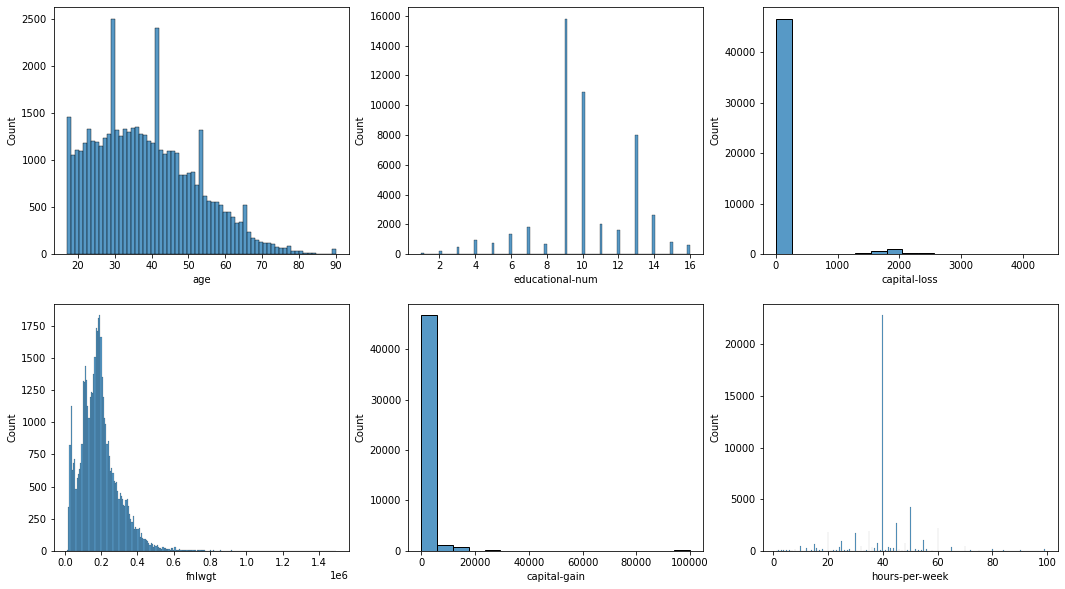

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
for i in range(len(numerical_columns)):
  k = i % 2
  t = i // 2
  sns.histplot(dataset.loc[:, numerical_columns[i]], ax = ax[k, t])
plt.show()

Observations:

1. age : Increasing age decreases count with high count at 30 and 40 age values.
2. educational-num : Max count at value 9. Increases on right and decreases on left.
3. capital-loss : Dominant value is 0.
4. capital-gain : Dominant value is 0.
5. fnlwgt : Max count at 0.2 with increases and descreases in middle.
6. hours-per-week : Dominant value is 40 hours per week with highest frequency.

##Categorical

###Histograms

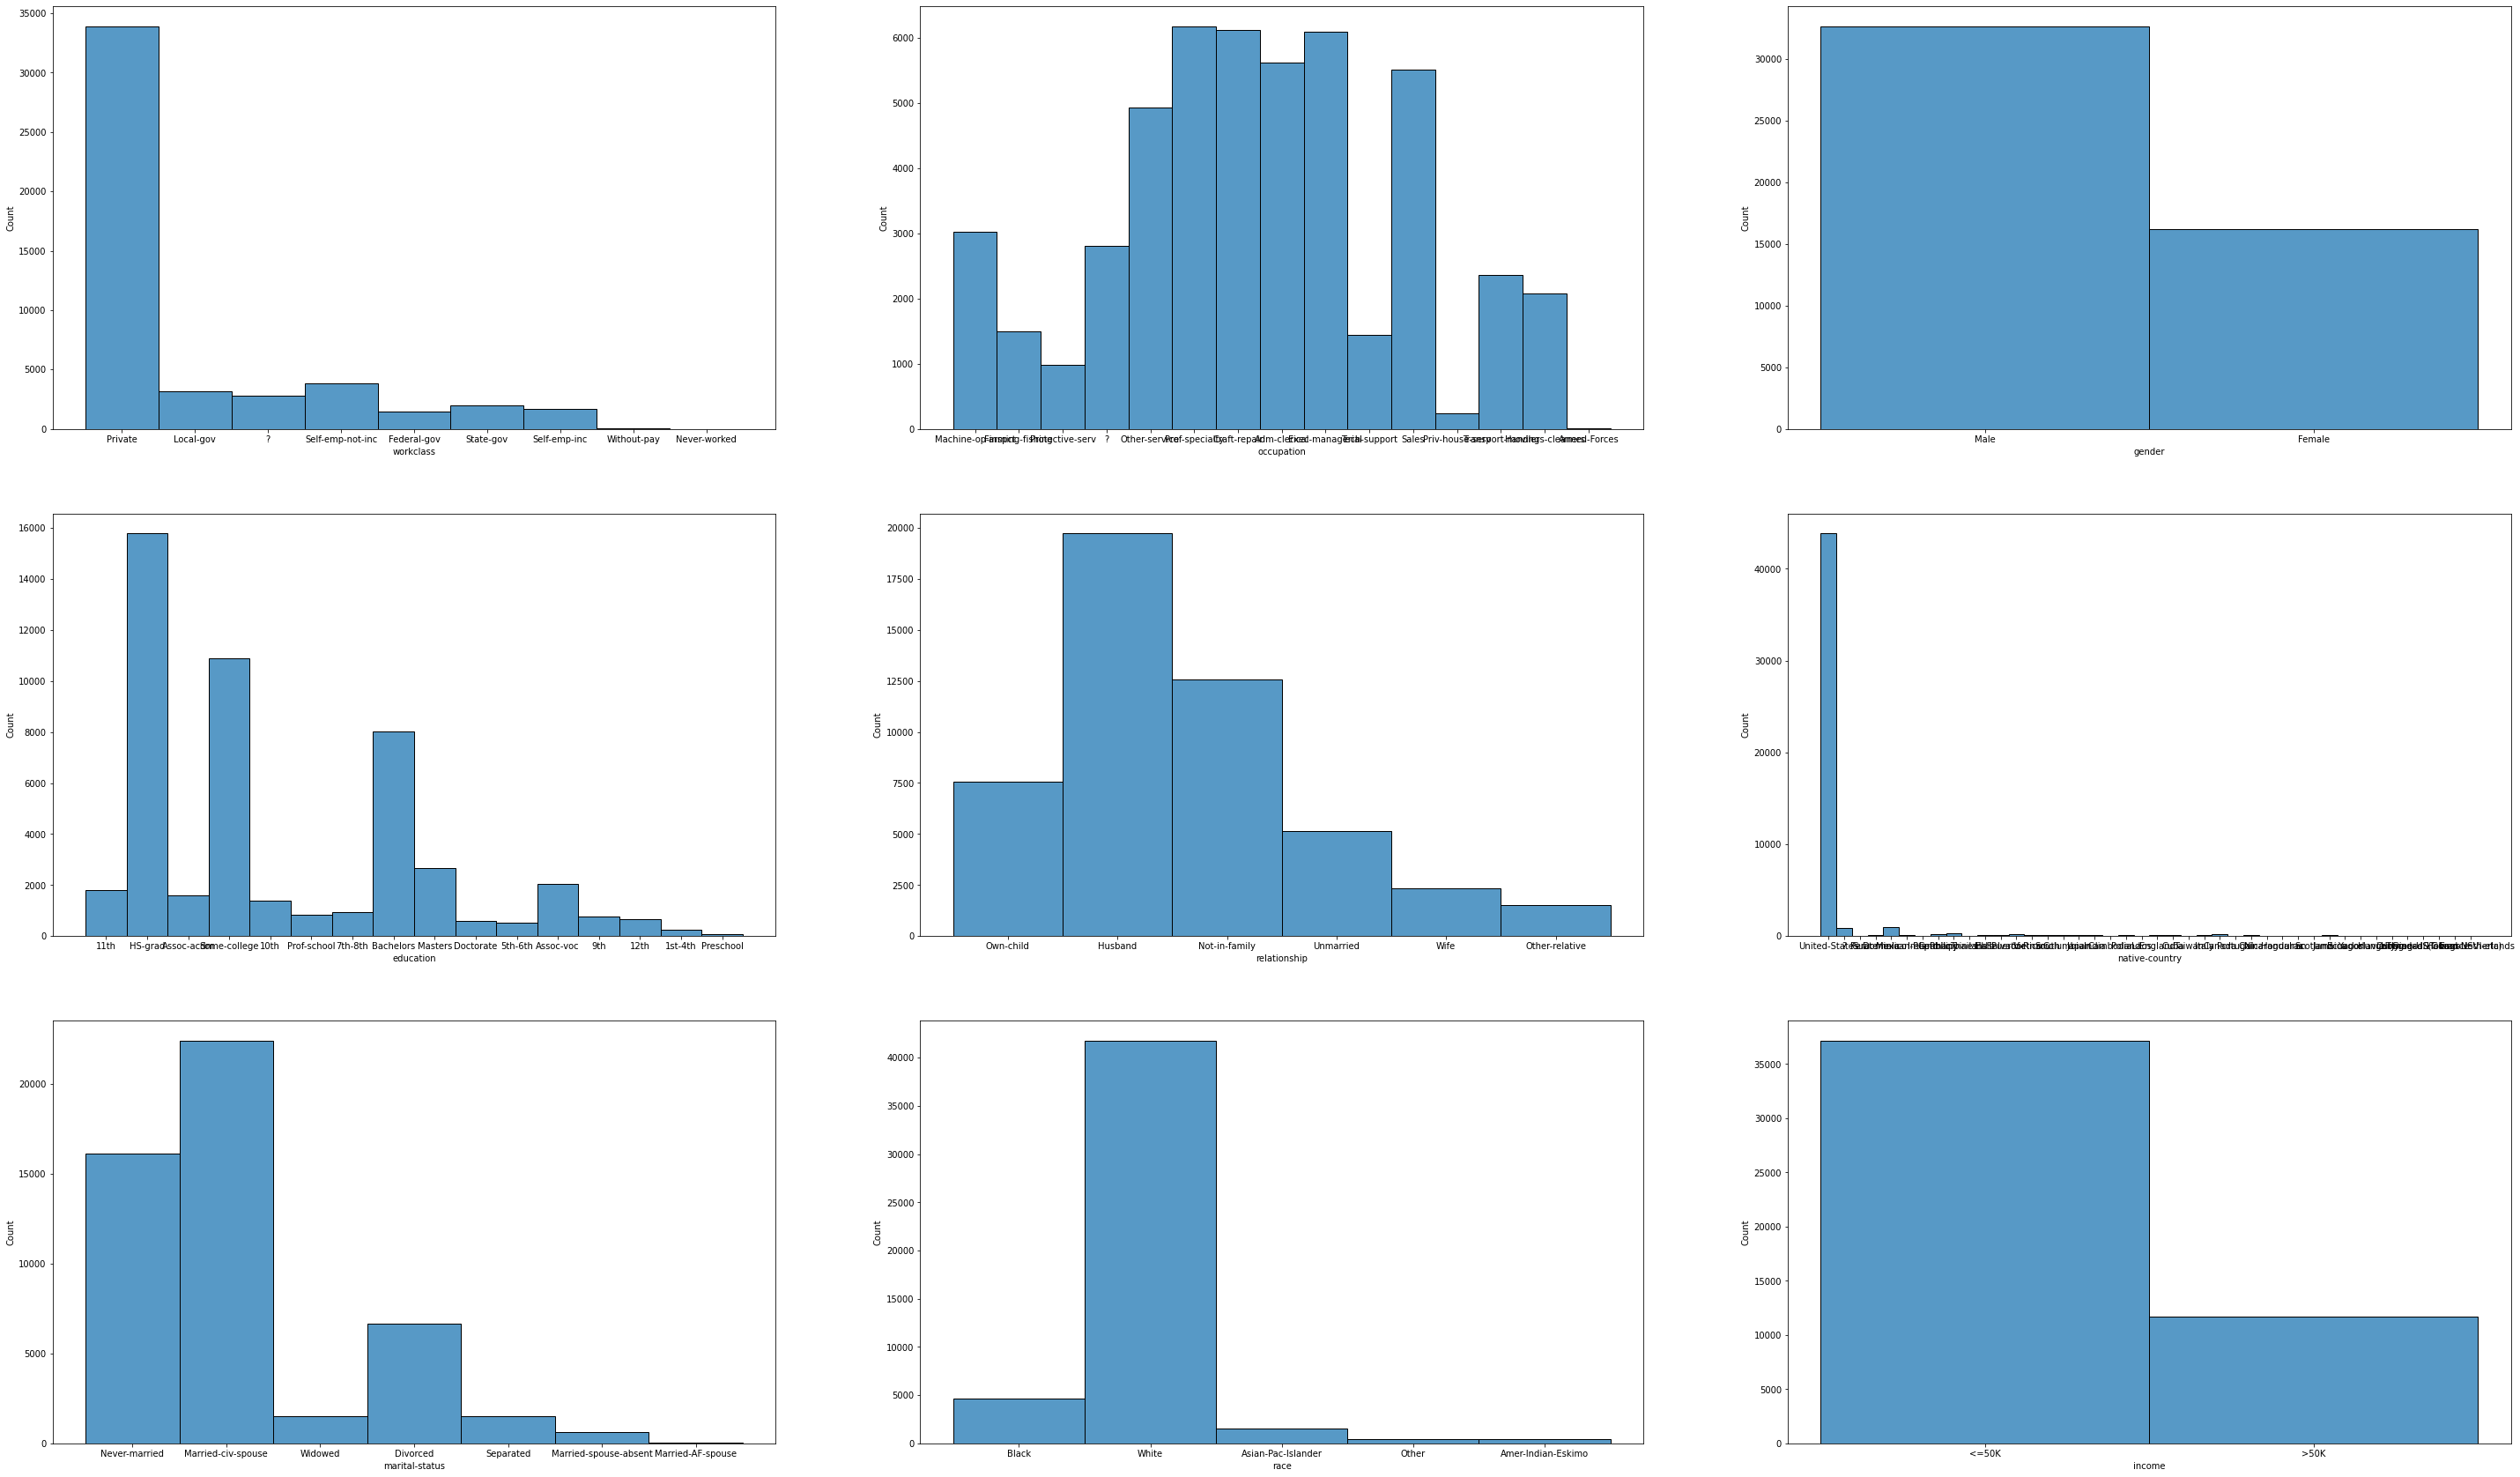

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(50, 30))
for i in range(len(categorical_columns)):
  k = i % 3
  t = i // 3
  sns.histplot(dataset.loc[:, categorical_columns[i]], ax = ax[k, t])
plt.show()

Observations

1. workclass : Majority of the adults are working in private sector.
2. occupation : Most values are fairly equally distributed with some frequencies tending less like armed forces due to fact of selection criteria.
3. gender : Frequency of male is almost double of that of females.
4. education : High value of high school graduate resembles most are somewhat educated.
5. relationshop : Maximum frequency of husband due to the fact that mostly gender values were male.
6. native-country : Dominant value being united states because of dataset creation berformed on United States collected data.
7. maritial status : High count of Married-civ-spouse and NEver married in respective order.
8. race : Dominant value being white due to the fact that dataset created at united states.
9. income : Most adults were earning income less that 50K per year with double the count as compared to greater than 50K. Could be result of a convenient sampling or volunteer sampling method while dataset creation.

###Pie Plots

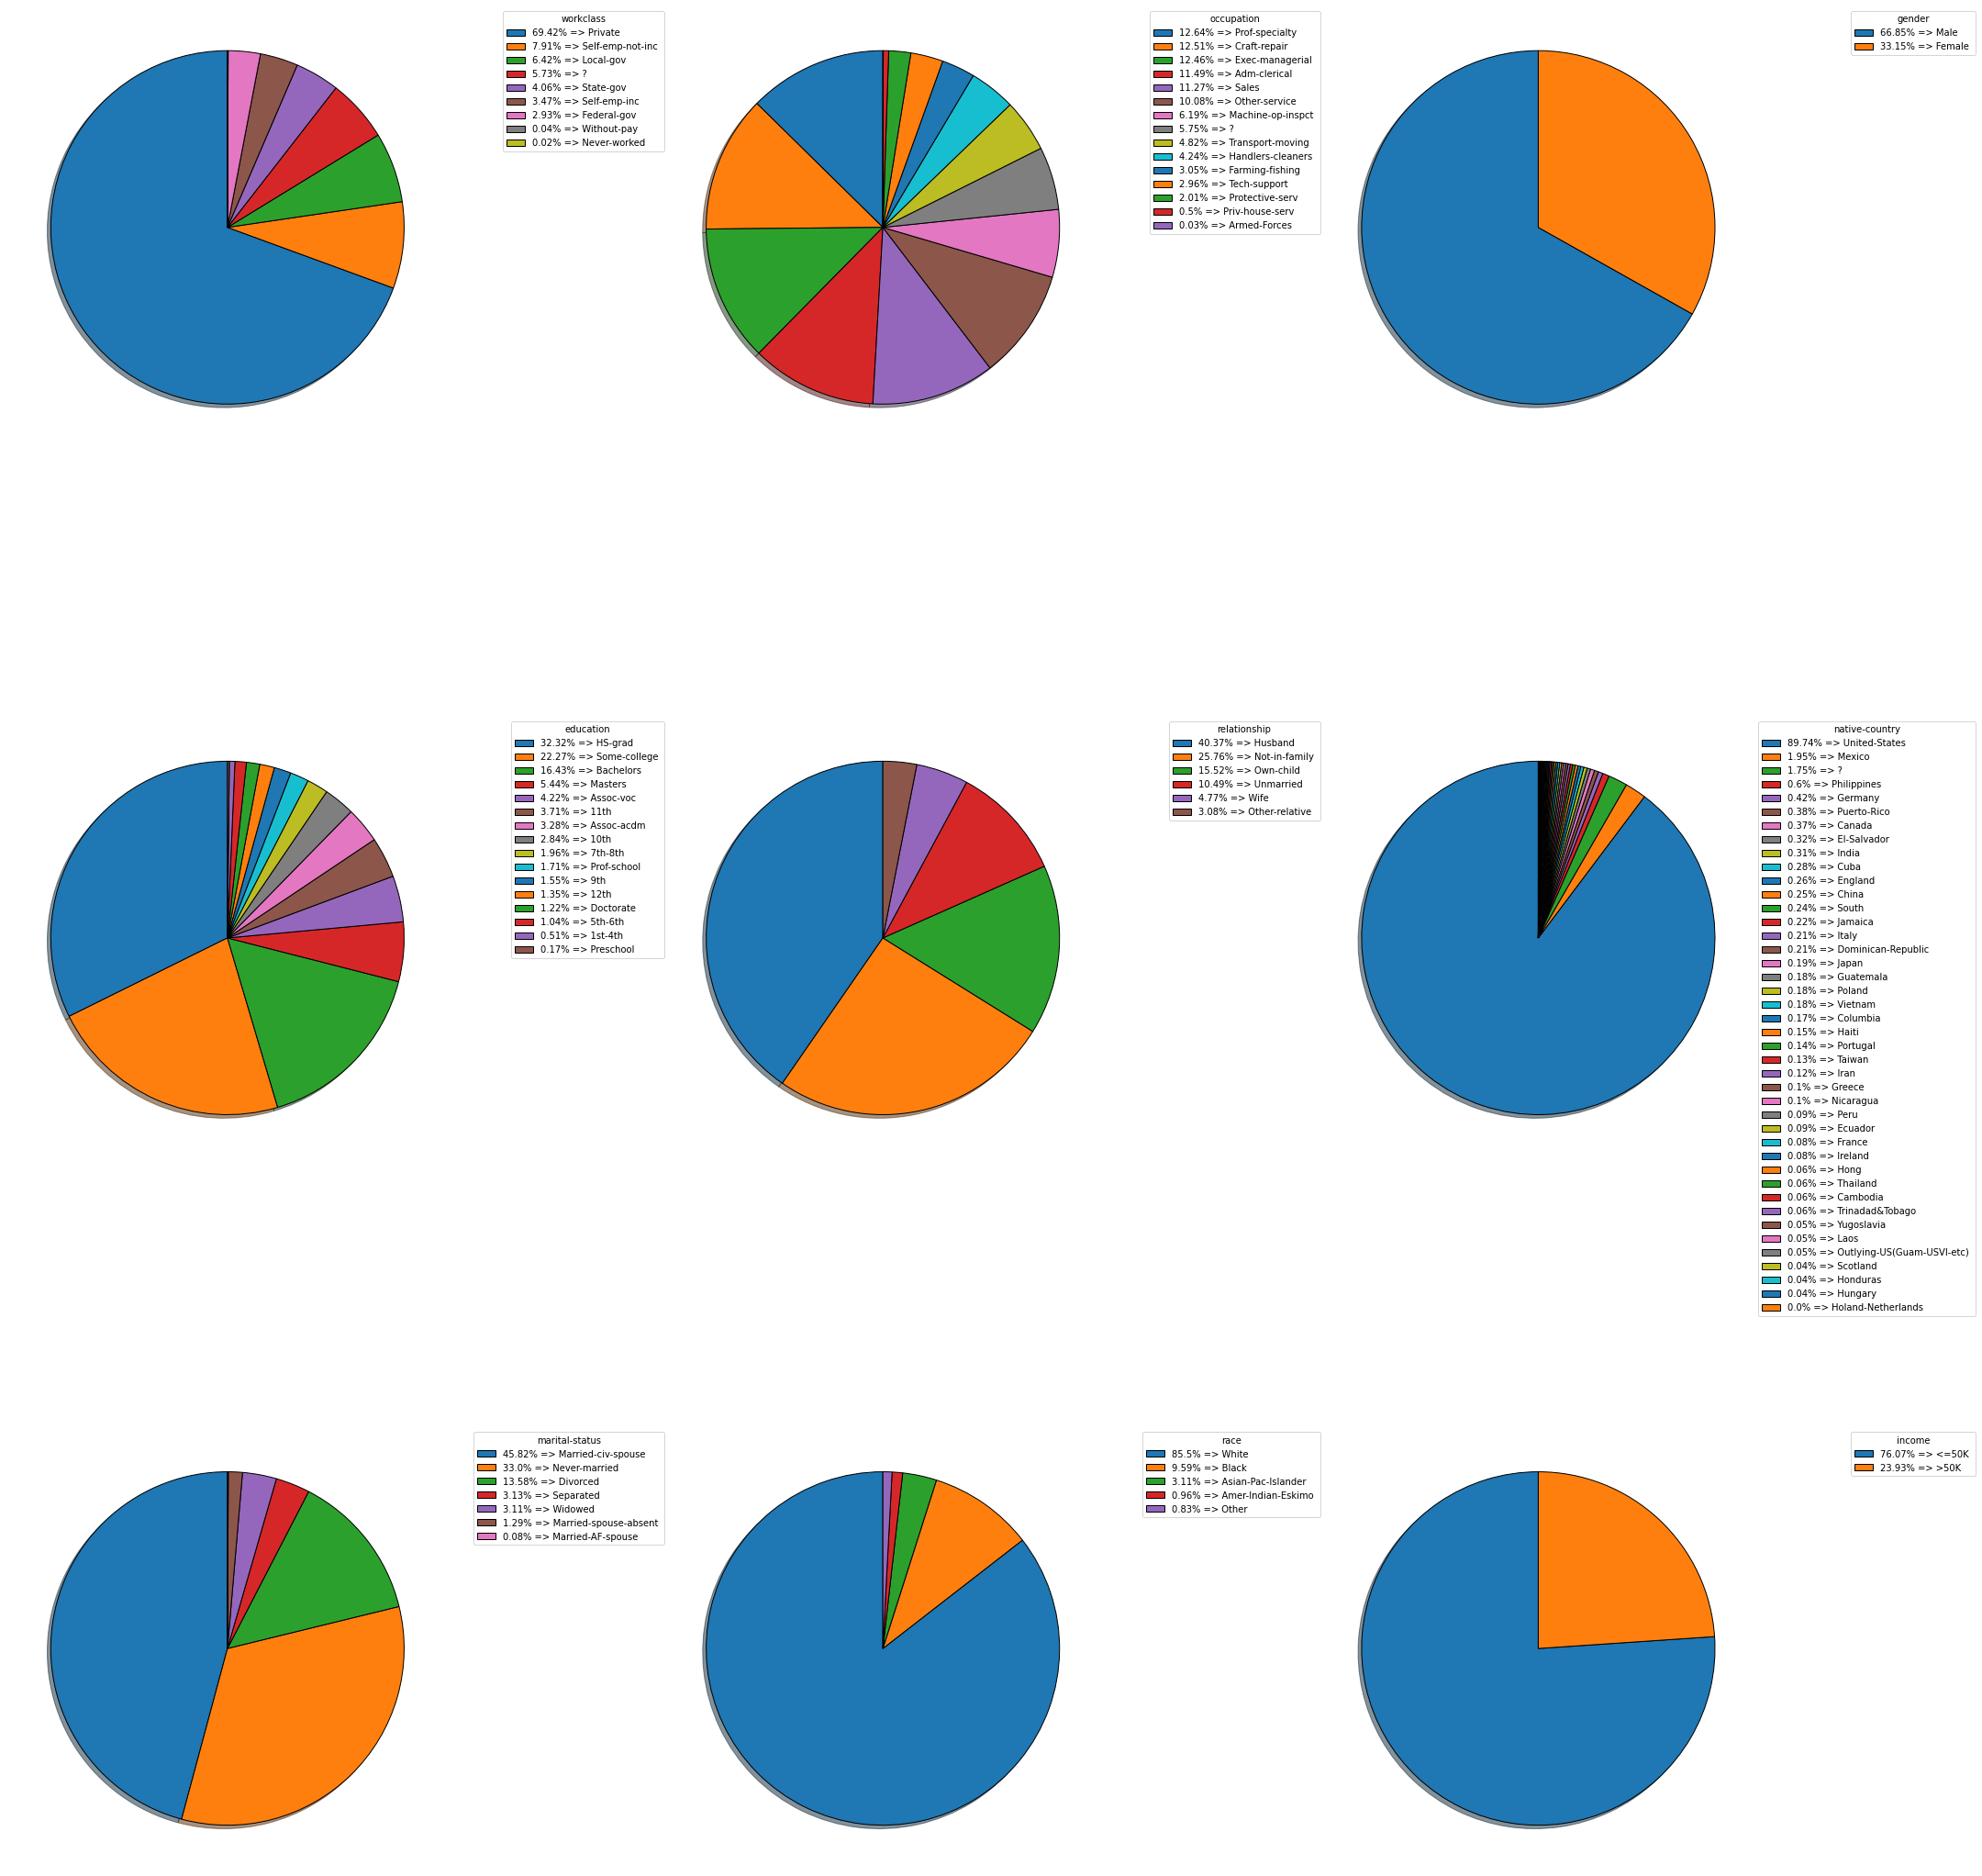

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
explode = (0, 0.1)
for i in range(len(categorical_columns)):
  k = i % 3
  t = i // 3
  df = pd.DataFrame(dataset.loc[:, categorical_columns[i]].value_counts())
  percentage = [round((i/sum(df.iloc[:, 0])) * 100, 2) for i in df.iloc[:, 0]]
  df["legend"] = [f"{percentage[i]}% => {df.index.values[i]} " for i in range(len(percentage))]
  ax[k,t].pie(dataset.loc[:, categorical_columns[i]].value_counts(), startangle=90, wedgeprops={'edgecolor': 'black'}, shadow=True)
  ax[k,t].legend(df["legend"], title = categorical_columns[i], loc ="upper right", bbox_to_anchor =(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

Observations : Similar to histograms

#Step 4

##Numerical

###Box Plot

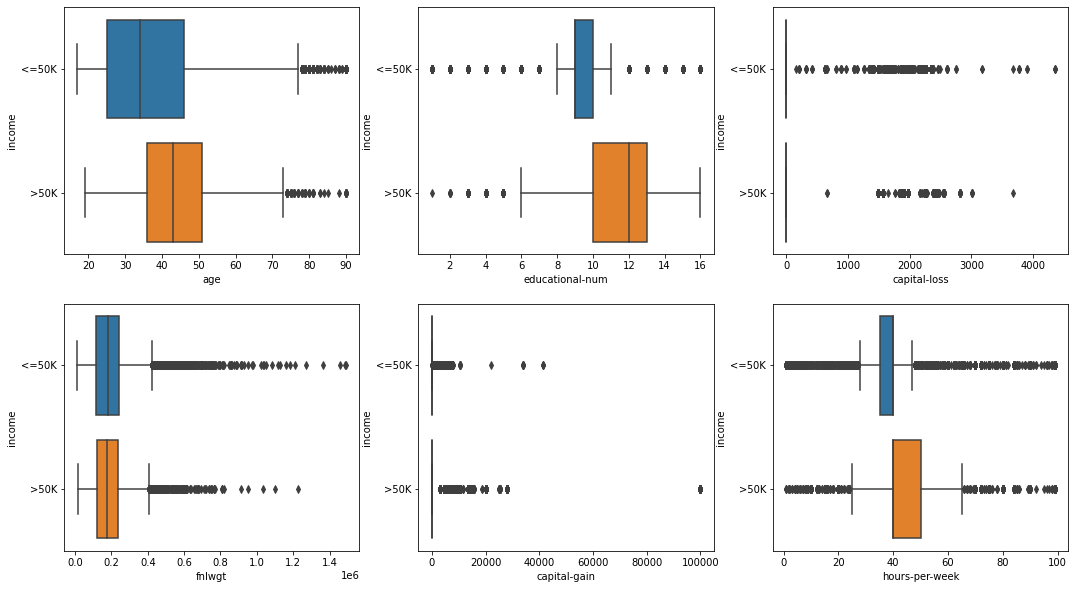

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
for i in range(len(numerical_columns)):
  k = i % 2
  t = i // 2
  sns.boxplot(dataset.loc[:, numerical_columns[i]], dataset.loc[:, "income"], ax = ax[k, t])
plt.show()

###Pair Plot

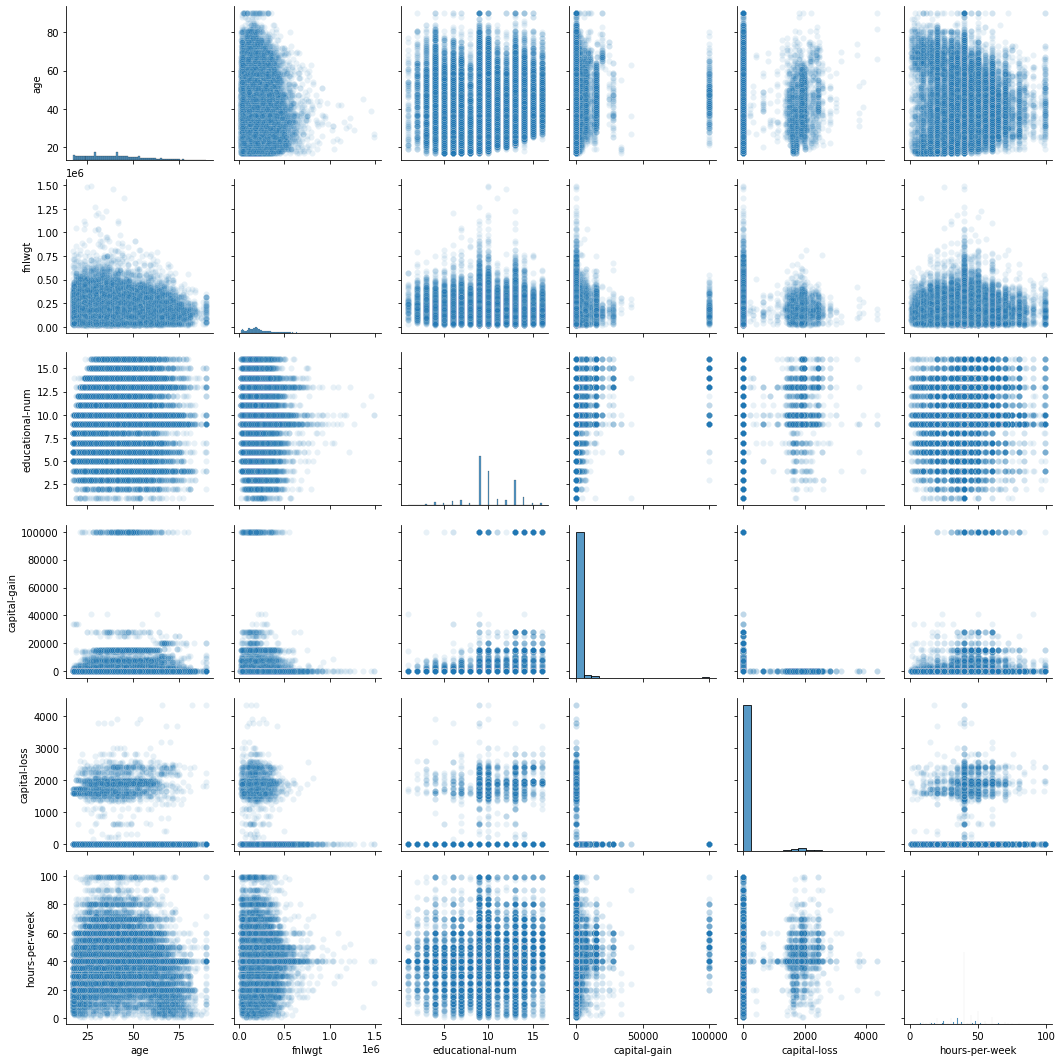

In [ ]:
sns.pairplot(dataset.loc[:, numerical_columns], kind="scatter", plot_kws={'alpha': 0.1})
plt.show()

##Categorical

###Swarm Plot

KeyboardInterrupt: ignored

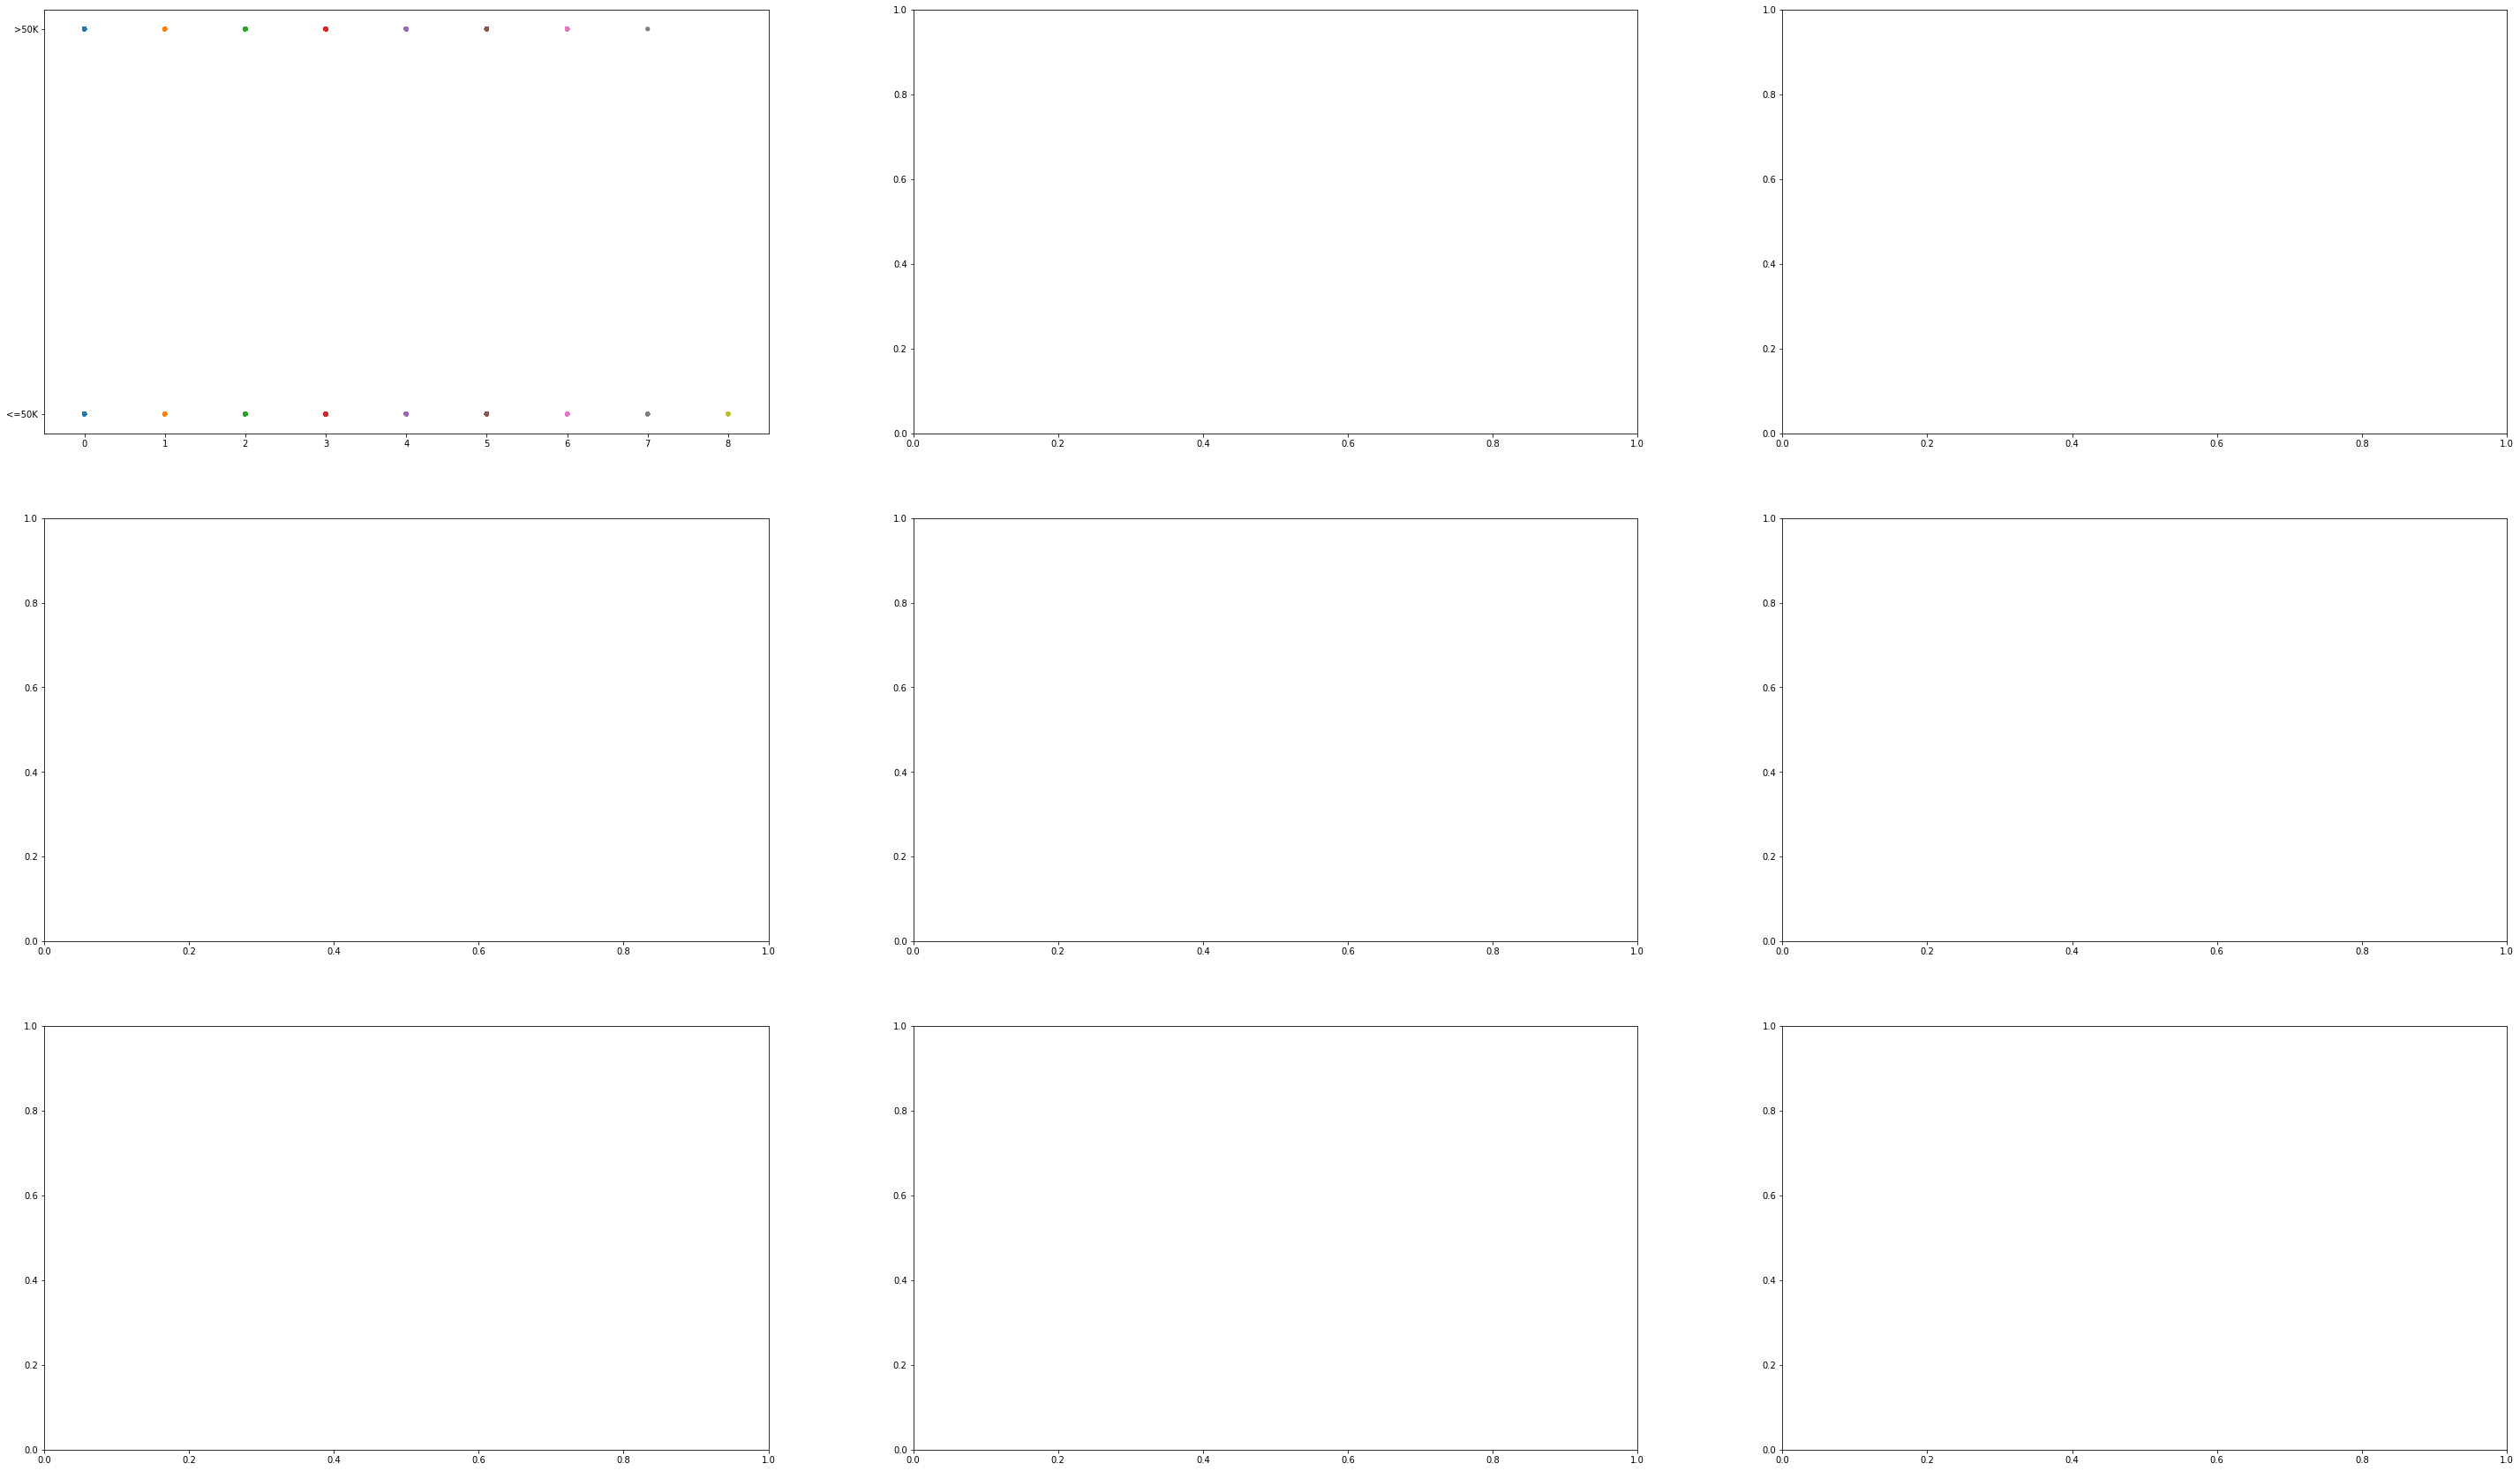

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(50, 30))
for i in range(len(categorical_columns)):
  k = i % 3
  t = i // 3
  sns.swarmplot(dataset.loc[:, categorical_columns[i]], dataset.loc[:, "income"], ax = ax[k, t])
plt.show()

###Box Plot

TypeError: ignored

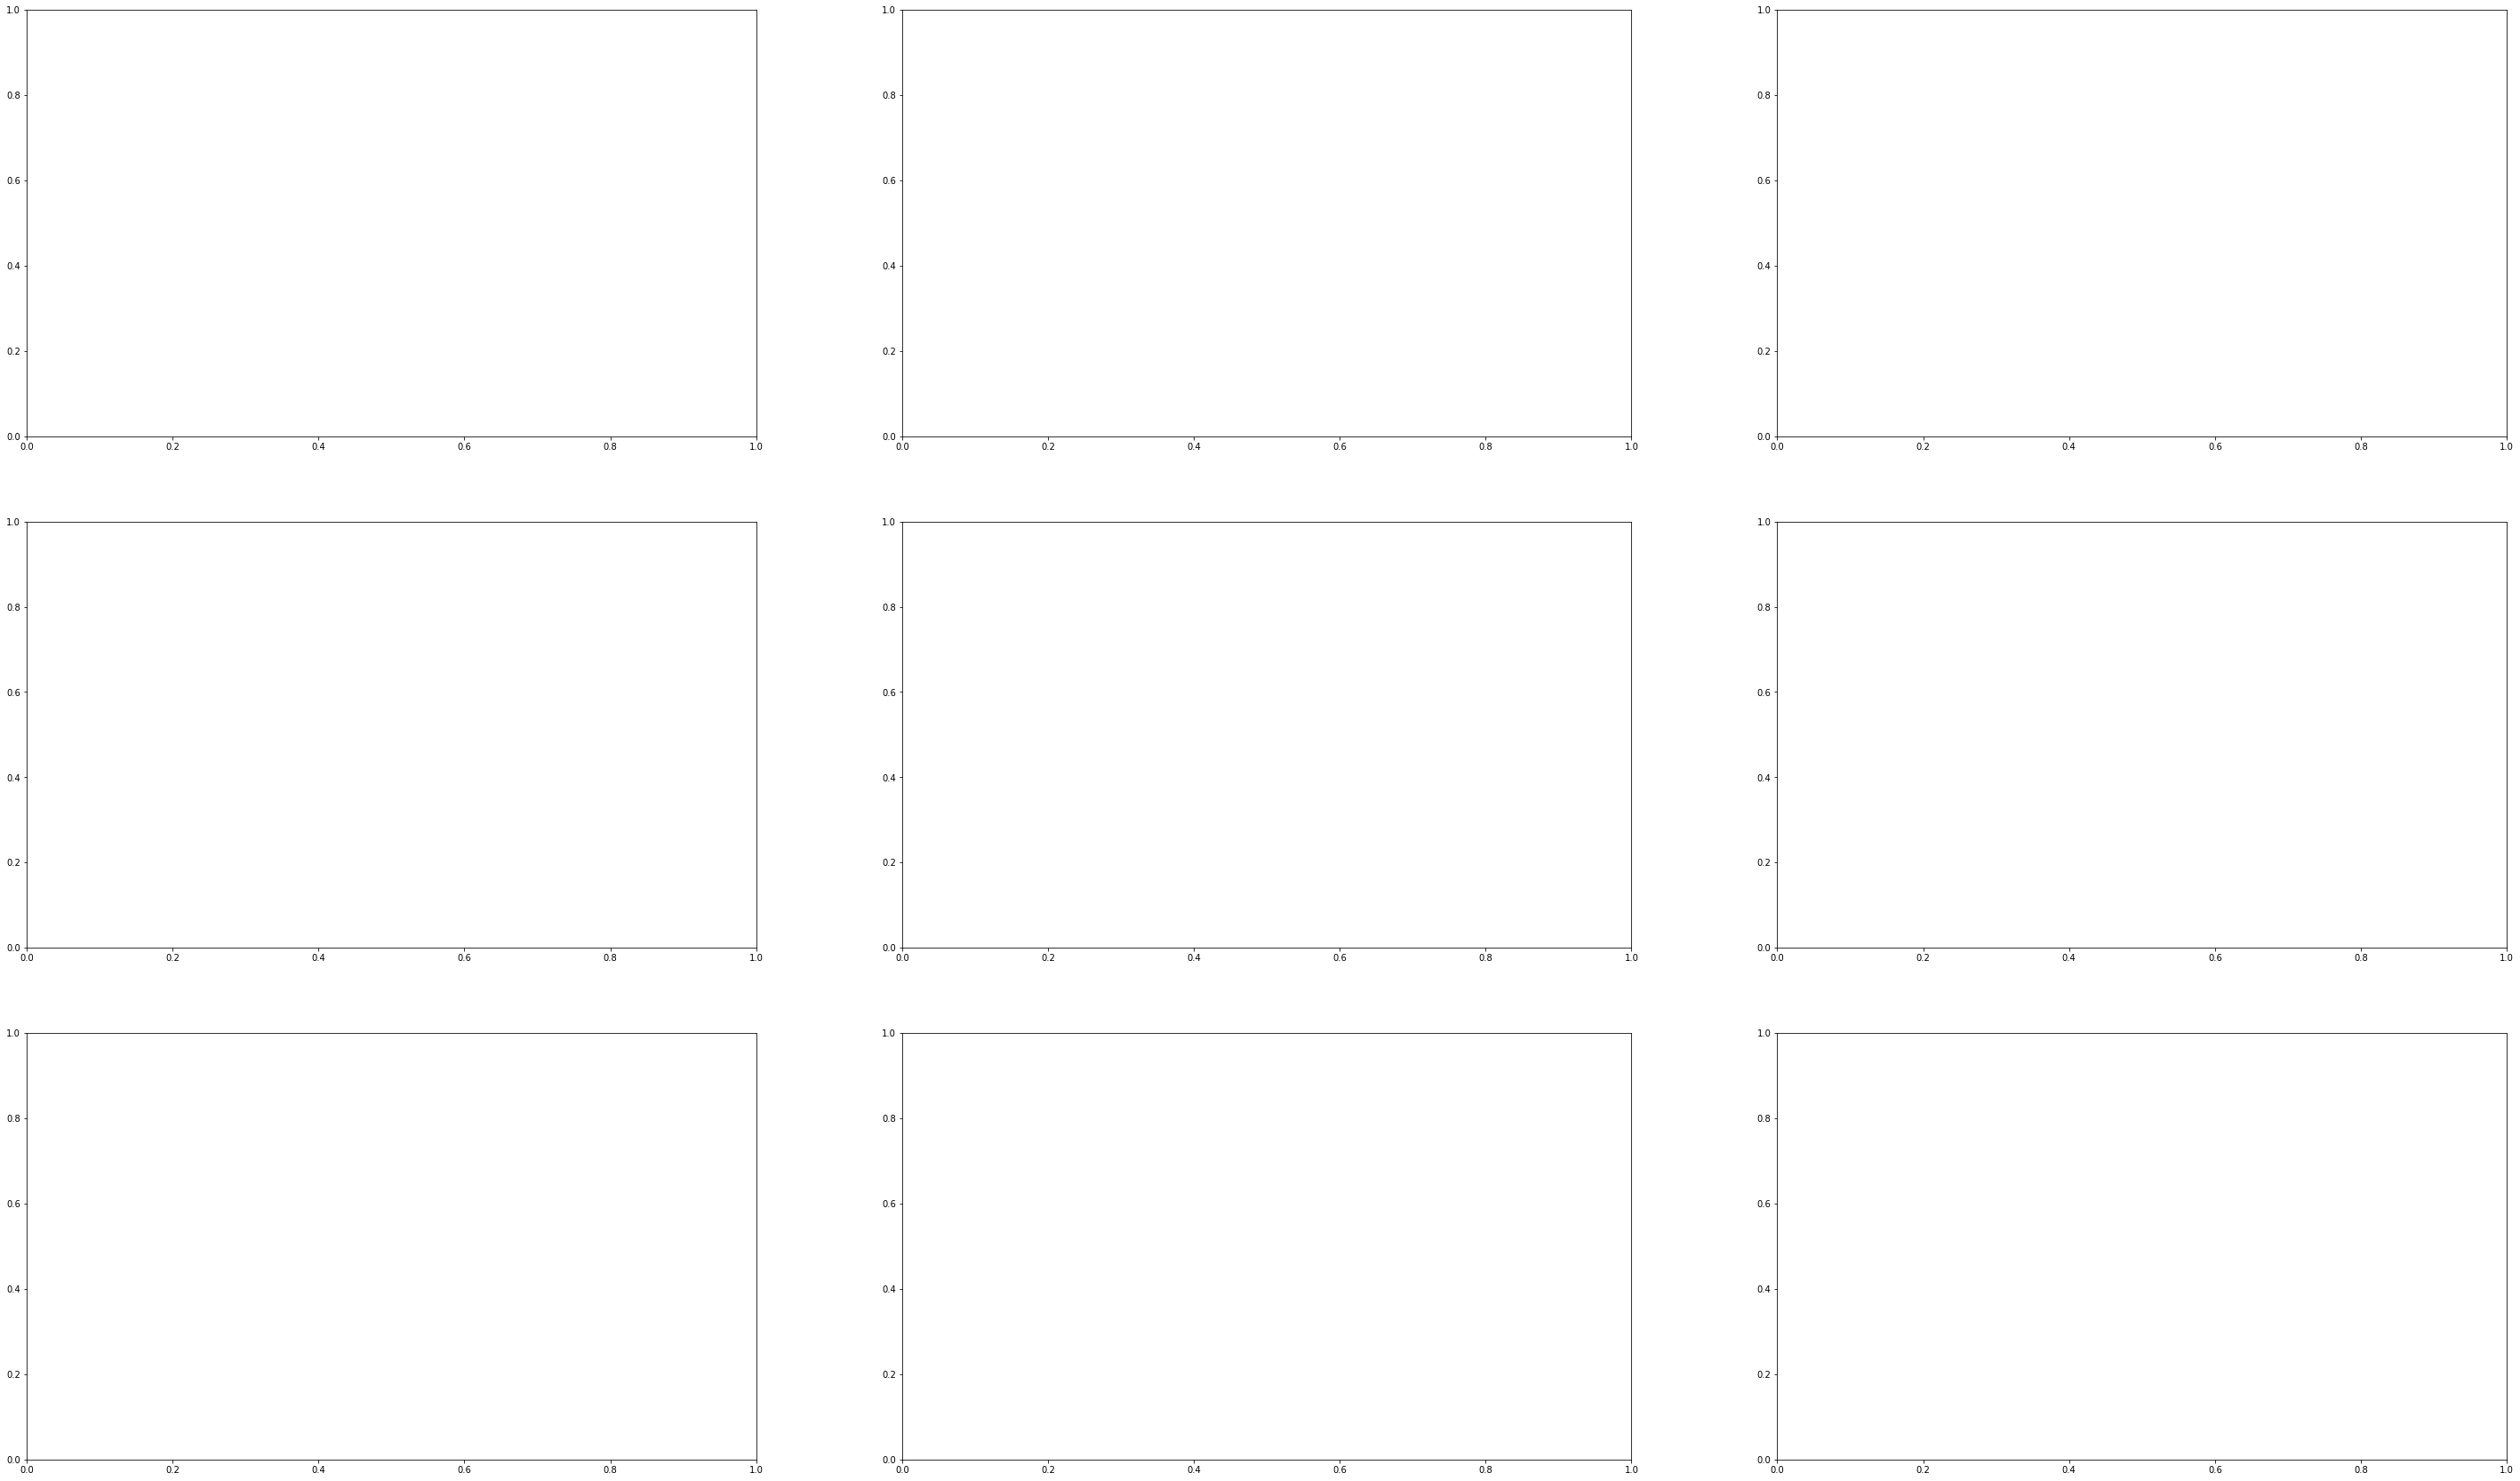

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(50, 30))
for i in range(len(categorical_columns)):
  k = i % 3
  t = i // 3
  sns.boxplot(dataset.loc[:, categorical_columns[i]], dataset.loc[:, "income" ], ax = ax[k, t])
plt.show()

#Step 5

##Identifying outliners

###Hypothesis Testing

In [ ]:
def grubbs_test(df, name):
  #Status Quo : There are no outliners
  # Bold Claim : There are more than one outliners
  n = len(df)
  mean = np.mean(df)
  std = np.std(df)
  numerator = max(abs(df - mean))
  g_calculated = numerator / std
  t_value = stats.t.ppf( 0.95 / (2 * n), n - 2)
  g_critical = ((n-1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
  if g_critical > g_calculated:
    print(f'We observe that calculated value is less than critical value. Hense we fail to reject null hypothesis and conclude that {name} has no outliners.')
  else:
    print(f'We observe that calculated value is greater than critical value. Hense we reject null hypothesis and conclude that {name} has outliners.')

In [ ]:
for i in numerical_columns:
  grubbs_test(dataset.loc[:, i].values, i)

We observe that calculated value is less than critical value. Hense we fail to reject null hypothesis and conclude that age has no outliners.
We observe that calculated value is greater than critical value. Hense we reject null hypothesis and conclude that fnlwgt has outliners.
We observe that calculated value is less than critical value. Hense we fail to reject null hypothesis and conclude that educational-num has no outliners.
We observe that calculated value is greater than critical value. Hense we reject null hypothesis and conclude that capital-gain has outliners.
We observe that calculated value is greater than critical value. Hense we reject null hypothesis and conclude that capital-loss has outliners.
We observe that calculated value is greater than critical value. Hense we reject null hypothesis and conclude that hours-per-week has outliners.


###Z Score

In [ ]:
def zscore(df, name):
  mean = np.mean(df)
  std = np.std(df)
  outliners = []
  for i in df:
    value = (i - mean) / std
    if abs(value) > 3:
      outliners.append(i)
    else:
      continue
  if len(outliners) == 0:
    print(f"From Z Test we conclude that {name} has no outliners")
  else:
    print(f"From Z Test we conclude that {name} has outliners")

In [ ]:
for i in numerical_columns:
  zscore(dataset.loc[:, i], i)

From Z Test we conclude that age has outliners
From Z Test we conclude that fnlwgt has outliners
From Z Test we conclude that educational-num has outliners
From Z Test we conclude that capital-gain has outliners
From Z Test we conclude that capital-loss has outliners
From Z Test we conclude that hours-per-week has outliners


###Robust Z Score

In [ ]:
def robust(df, name):
  median = np.median(df)
  mad = stats.median_absolute_deviation(df)
  outliners = []
  for i in df:
    rzscore = (0.6745 * (i - median)) / mad
    if abs(rzscore) > 3:
      outliners.append(i)
    else:
      continue
  if len(outliners) == 0:
    print(f"From Robust Z Score we conclude that {name} has no outliner")
  else:
    print(f"From Robust Z Score we conclude that {name} has outliners")

In [ ]:
for i in numerical_columns:
  robust(dataset.loc[:, i].values, i)

From Robust Z Score we conclude that age has no outliner
From Robust Z Score we conclude that fnlwgt has outliners
From Robust Z Score we conclude that educational-num has outliners
From Robust Z Score we conclude that capital-gain has outliners
From Robust Z Score we conclude that capital-loss has outliners
From Robust Z Score we conclude that hours-per-week has outliners


###IQR Method

In [ ]:
def iqr(df, name):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  lower_tail = q1 - 1.5 * iqr
  upper_tail = q3 + 1.5 * iqr
  outliners = []
  for i in df:
    if i > upper_tail or i < lower_tail:
      outliners.append(i)
    else:
      continue
  if len(outliners) == 0:
    print(f"From Inter Quantile range method we conclude that {name} has no outliners")
  else:
    print(f"From Inter Quantile range method we conclude that {name} has outliners")

In [ ]:
for i in numerical_columns:
  iqr(dataset.loc[:, i], i)

From Inter Quantile range method we conclude that age has outliners
From Inter Quantile range method we conclude that fnlwgt has outliners
From Inter Quantile range method we conclude that educational-num has outliners
From Inter Quantile range method we conclude that capital-gain has outliners
From Inter Quantile range method we conclude that capital-loss has outliners
From Inter Quantile range method we conclude that hours-per-week has outliners


###Percentile Capping

In [ ]:
def winsorization(df, name):
  q1 = np.percentile(df, 1)
  q3 = np.percentile(df, 99)
  outliners = []
  for i in df:
    if i > q3 or i < q1:
      outliners.append(i)
    else:
      continue
  if len(outliners) == 0:
    print(f"From Percentile clapping method we conclude that {name} has no outliners")
  else:
    print(f"From Percentile clapping method we conclude that {name} has outliners")

In [ ]:
for i in numerical_columns:
  winsorization(dataset.loc[:, i], i)

From Percentile clapping method we conclude that age has outliners
From Percentile clapping method we conclude that fnlwgt has outliners
From Percentile clapping method we conclude that educational-num has outliners
From Percentile clapping method we conclude that capital-gain has outliners
From Percentile clapping method we conclude that capital-loss has outliners
From Percentile clapping method we conclude that hours-per-week has outliners


###DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
def dbscan(df):
  dbscan = DBSCAN(eps=2)
  clusters = dbscan.fit_predict(df.values.reshape(-1, 1))
  ouliners = [x for x in cluster if x == -1]
  if len(outliners) == 0:
    print("Dataset does not have outliners")
  else:
    print("Dataset has outliners")

In [ ]:
dbscan(dataset.loc[:, numerical_columns])

##Removing outliners

###Deleting outliners

In [ ]:
def delete_outliners(returndataset = False):
  fig, ax = plt.subplots(2, 2, figsize=(18, 10))
  datasetcopy = dataset.copy()
  delete_column = [x for x in numerical_columns if x not in ['capital-loss', 'capital-gain']]
  for index,i in enumerate(delete_column):
    df = datasetcopy.loc[:, i]
    iqr = np.percentile(df, 75) - np.percentile(df, 25)
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    datasetcopy.drop(datasetcopy[datasetcopy[i] < lower_bound].index, inplace = True)
    datasetcopy.drop(datasetcopy[datasetcopy[i] > upper_bound].index, inplace = True)
    k = index % 2
    t = index // 2
    sns.boxplot(datasetcopy.loc[:, i], ax = ax[k, t])
  plt.show()
  if returndataset == True:
    return datasetcopy

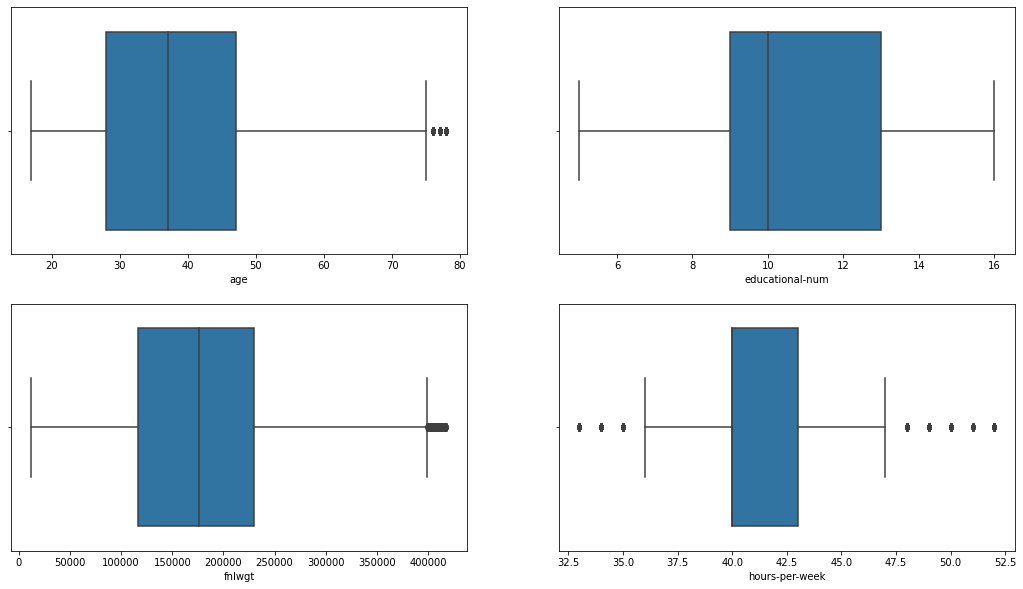

In [ ]:
delete_outliners()

#Step 6

A Successful EDA on the following dataset was performed and vaious analysis of numerical and categorical features was done with respect to univate and bivariate analysis. Outliners in the dataset were recognized using various methods like Hypothesis testing, Z Score, Robust Z Score, IQR Method, Percentile Clapping and DBSCAN. After detection these outliners were handled by deleting them.

#Step 7

In [ ]:
data = dataset.copy()

##Numerical Column

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,Private,0.351675,11th,-1.197259,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.144804,-0.217127,-0.034087,United-States,<=50K
1,-0.046942,Private,-0.945524,HS-grad,-0.419335,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.144804,-0.217127,0.772930,United-States,<=50K
2,-0.776316,Local-gov,1.394723,Assoc-acdm,0.747550,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.144804,-0.217127,-0.034087,United-States,>50K
3,0.390683,Private,-0.277844,Some-college,-0.030373,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.886874,-0.217127,-0.034087,United-States,>50K
4,-1.505691,?,-0.815954,Some-college,-0.030373,Never-married,?,Own-child,White,Female,-0.144804,-0.217127,-0.841104,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,Private,0.640492,Assoc-acdm,0.747550,Married-civ-spouse,Tech-support,Wife,White,Female,-0.144804,-0.217127,-0.195490,United-States,<=50K
48838,0.098933,Private,-0.334178,HS-grad,-0.419335,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.144804,-0.217127,-0.034087,United-States,>50K
48839,1.411808,Private,-0.357510,HS-grad,-0.419335,Widowed,Adm-clerical,Unmarried,White,Female,-0.144804,-0.217127,-0.034087,United-States,<=50K
48840,-1.213941,Private,0.111984,HS-grad,-0.419335,Never-married,Adm-clerical,Own-child,White,Male,-0.144804,-0.217127,-1.648120,United-States,<=50K


##Categorical Column

In [ ]:
categorical_index = [x for x,y in enumerate(dataset.columns) if y in categorical_columns]
categorical_index

[1, 3, 5, 6, 7, 8, 9, 13, 14]

In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(sparse = False), categorical_index[:-1])], remainder="passthrough")
X = ct.fit_transform(X)

In [ ]:
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 , -0.03408696],
       [ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 ,  0.77292975],
       [ 0.        ,  0.        ,  1.        , ..., -0.14480353,
        -0.2171271 , -0.03408696],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 , -0.03408696],
       [ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 , -1.64812038],
       [ 0.        ,  0.        ,  0.        , ...,  1.87131501,
        -0.2171271 , -0.03408696]])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y = lb.fit_transform(Y)

In [ ]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Step 8

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
performance = []
def performance_get(clf):
  Y_pred = clf.predict(X_test)
  precision = precision_score(Y_test, Y_pred)
  accuracy = accuracy_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred)
  recall = recall_score(Y_test, Y_pred)
  performance.append([precision, accuracy, f1, recall])

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, Y_train)
performance_get(log_clf)

##SVM Kernalised

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
performance_get(svc_clf)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, Y_train)
performance_get(tree_clf)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, Y_train)
performance_get(forest_clf)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
performance_get(knn_clf)

##Gradient Boosting Classififer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gcb_clf = GradientBoostingClassifier()
gcb_clf.fit(X_train, Y_train)
performance_get(gcb_clf)

#Step 9

In [ ]:
performance_dataset = pd.DataFrame(performance)

In [ ]:
performance_dataset.columns = ["Precision", "Accuracy", "F1", "Recall"]

In [ ]:
performance_dataset.index = ["Logistic Regression", "SVM Kernalised Classifier", "Deccision Tree Classifier", "Random Forest Classifier", "KNN CLassifier", "Gradient Boosting Classifier"]

In [ ]:
performance_dataset

,Precision,Accuracy,F1,Recall
Logistic Regression,0.727926,0.850752,0.660456,0.604433
SVM Kernalised Classifier,0.754162,0.853619,0.655256,0.579284
Deccision Tree Classifier,0.610492,0.814618,0.620096,0.630009
Random Forest Classifier,0.743216,0.858942,0.682196,0.630435
KNN CLassifier,0.678538,0.836831,0.641959,0.609122
Gradient Boosting Classifier,0.801127,0.869280,0.690124,0.606138


#Step 10


Gradient Boosting works by sequentially adding predictorsto an ensemble, each one correcting its predecessor. Instead of tweaking the instances weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.